In [1]:
from collections import Counter
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm

import anndata
import scanpy as sc

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib as mpl

In [3]:
SEED = 1235
random.seed(SEED)
np.random.seed(SEED)

In [11]:
mpl.rcParams['figure.facecolor'] = 'white'

In [ ]:
orig_data_path = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_data/harmony_common_pancreas_20241025.h5ad"
BASE_PATH = "/home/sr2464/scratch/C2S_Files/CellOT_files/pancreas_training_runs/run8_X_harmony/evals_iid_data_space"
cell_ot_transported_data_path = os.path.join(BASE_PATH, "imputed.h5ad")

In [7]:
orig_adata = anndata.read_h5ad(orig_data_path)
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [8]:
print(orig_adata.X.data.max())
print(orig_adata.X.data.mean())
print(orig_adata.X.data.min())

8.047143
0.95751846
0.13720855


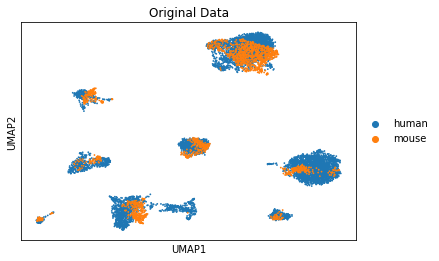

In [12]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "orig_data_color_species.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

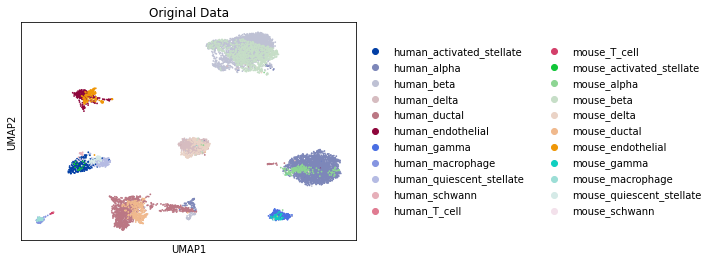

In [13]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "orig_data_color_cell_type.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Sanity check

In [ ]:
orig_adata

In [ ]:
del orig_adata.obsm
del orig_adata.uns
del orig_adata.varm
del orig_adata.obsp

In [ ]:
orig_adata

In [ ]:
orig_adata.raw is None

In [ ]:
sc.pp.highly_variable_genes(orig_adata, subset=False,n_top_genes=2000,batch_key='batch_sample')
sc.tl.pca(orig_adata,use_highly_variable=True)
sc.external.pp.harmony_integrate(orig_adata,'batch_sample',basis='X_pca',adjusted_basis='X_pca_harmony_library')

In [ ]:
orig_adata

In [ ]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

In [ ]:
sc.tl.umap(orig_adata)

In [ ]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

In [ ]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
plt.show()
plt.close()

Looks like Harmony did not fully converge when trying to plot it.

Instead, try to just run neighbors and umap

In [14]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [15]:
del orig_adata.obsm["X_umap"]
del orig_adata.obsp

In [16]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'

In [17]:
sc.pp.neighbors(orig_adata, use_rep="X_pca_harmony_library")

In [18]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [19]:
sc.tl.umap(orig_adata)

In [20]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

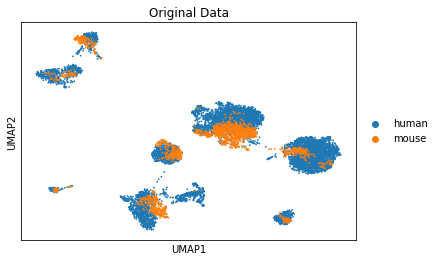

In [23]:
sc.pl.umap(
    orig_adata,
    color="species_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "harmony_umap_color_cell_type.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

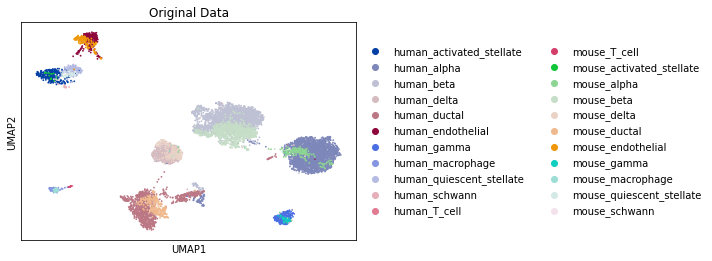

In [24]:
sc.pl.umap(
    orig_adata,
    color="species_cell_type_label",
    title="Original Data",
    show=False
)
# plt.savefig(os.path.join(BASE_PATH, "harmony_umap_color_cell_type.png"),
#             facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

Neighbors and UMAP algorithms are running correctly/consistently, these UMAPs look good. The Harmony run on my machine converges too fast compared to Sam's run, but no need to rerun Sam's embeddings. Can use Harmony embeddings to plot

# Read CellOT data

In [25]:
cell_ot_transport_adata = anndata.read_h5ad(cell_ot_transported_data_path)
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

Reduce original adata to just harmony embeddings

In [26]:
orig_adata

AnnData object with n_obs × n_vars = 9436 × 12113
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'
    var: 'homolog_pair_idx', 'human_gene_name', 'mouse_gene_name', 'human_gene_ensembl_id', 'mouse_gene_ensembl_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'neighbors', 'pca', 'species_label_colors', 'umap', 'species_cell_type_label_colors'
    obsm: 'X_pca', 'X_pca_harmony_library', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
orig_adata_reduced = anndata.AnnData(
    X=orig_adata.obsm["X_pca_harmony_library"],
    var=cell_ot_transport_adata.var.copy(),
    obs=orig_adata.obs.copy()
)

In [28]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [29]:
# orig_adata_reduced.obsm["X_pca_harmony_library"] = orig_adata_reduced.X

In [30]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [31]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

# Visualize CellOT transported

In [32]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [33]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [34]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [35]:
cell_ot_transport_adata.X[:5, :5]

array([[ 2.8801236 , -0.6614177 , -0.10926032, -2.8938918 ,  0.45641634],
       [ 3.422303  , -0.7019694 ,  0.4547639 , -3.9902573 ,  1.5768073 ],
       [-8.019645  , -4.15809   ,  8.987357  ,  1.667612  , -1.5492542 ],
       [ 6.013003  , -4.320307  , -1.1801445 ,  0.49632597, -1.0765672 ],
       [ 2.632904  ,  2.836129  ,  0.5248985 , -0.8259672 ,  0.23185381]],
      dtype=float32)

In [36]:
# sc.tl.pca(cell_ot_transport_adata)
cell_ot_transport_adata.obsm["X_pca"] = cell_ot_transport_adata.X

In [37]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    obsm: 'X_pca'

In [38]:
cell_ot_transport_adata.obsm["X_pca"].shape

(500, 50)

In [39]:
sc.pp.neighbors(cell_ot_transport_adata)

/gpfs/radev/home/sr2464/.conda/envs/cellot/lib/python3.9/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [40]:
sc.tl.umap(cell_ot_transport_adata)

In [41]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [42]:
cell_ot_transport_adata.obs.head()

,cell_barcodes,cell_manual_ids,cell_types,batch_sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,species_cell_type_label,species_label,transport,split
human1_lib1.final_cell_0032,AATATCTTC-ATGTTGGC,human1_lib1.final_cell_0032,delta,GSM2230757_human1_umifm_counts,2002,2002,7051.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0034,GACACGGACT-CTGAGTGC,human1_lib1.final_cell_0034,delta,GSM2230757_human1_umifm_counts,1698,1698,6475.0,0.0,0.0,human_delta,human,source,test
human1_lib1.final_cell_0041,GTAACGTT-ATGACTTT,human1_lib1.final_cell_0041,activated_stellate,GSM2230757_human1_umifm_counts,3377,3377,12169.0,0.0,0.0,human_activated_stellate,human,source,test
human1_lib1.final_cell_0088,ACTAGATTG-TCCCAATC,human1_lib1.final_cell_0088,beta,GSM2230757_human1_umifm_counts,2069,2068,5979.0,0.0,0.0,human_beta,human,source,test
human1_lib1.final_cell_0135,GAGCGTTGCT-AACACACG,human1_lib1.final_cell_0135,alpha,GSM2230757_human1_umifm_counts,2460,2460,6151.0,0.0,0.0,human_alpha,human,source,test


In [43]:
Counter(cell_ot_transport_adata.obs["species_label"].tolist())

Counter({'human': 500})

In [44]:
Counter(cell_ot_transport_adata.obs["split"].tolist())

Counter({'test': 500})

In [45]:
Counter(cell_ot_transport_adata.obs["transport"].tolist())

Counter({'source': 500})

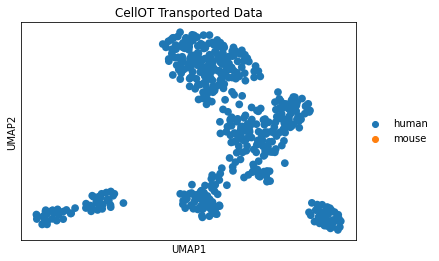

In [46]:
sc.pl.umap(
    cell_ot_transport_adata,
    color="species_label",
    title="CellOT Transported Data",
    show=False,
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_transport_adata_umap.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

# Comebine adatas, see where transported cells are

In [47]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [48]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'
    uns: 'neighbors', 'umap', 'species_label_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [49]:
del orig_adata_reduced.obsm
del orig_adata_reduced.uns
del orig_adata_reduced.varm
del orig_adata_reduced.obsp

In [50]:
del cell_ot_transport_adata.obsm
del cell_ot_transport_adata.uns
del cell_ot_transport_adata.varm
del cell_ot_transport_adata.obsp

In [51]:
orig_adata_reduced

AnnData object with n_obs × n_vars = 9436 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label'

In [52]:
cell_ot_transport_adata

AnnData object with n_obs × n_vars = 500 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport', 'split'

In [53]:
orig_data_label = ["Original Data (" + species_label + ")" for species_label in orig_adata_reduced.obs["species_label"]]
orig_adata_reduced.obs["transport_flag"] = orig_data_label
cell_ot_transport_adata.obs["transport_flag"] = "Transported Human -> Mouse Cells"

In [54]:
combined_adata = orig_adata_reduced.concatenate(cell_ot_transport_adata)
combined_adata

<ipython-input-54-60d92f2afd77>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined_adata = orig_adata_reduced.concatenate(cell_ot_transport_adata)


AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

In [ ]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'

# Visualize

In [56]:
# sc.tl.pca(combined_adata)
combined_adata.obsm["X_pca"] = combined_adata.X

In [57]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    obsm: 'X_pca'

In [58]:
sc.pp.neighbors(combined_adata)

In [59]:
sc.tl.umap(combined_adata)

In [60]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

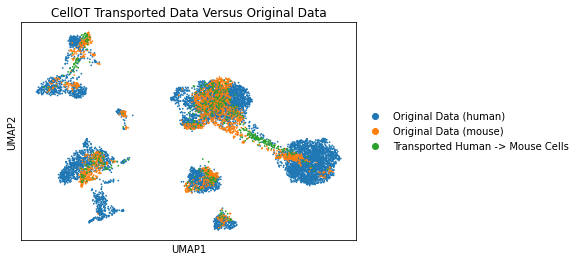

In [61]:
sc.pl.umap(
    combined_adata,
    color="transport_flag",
    title="CellOT Transported Data Versus Original Data",
    show=False
)
plt.savefig(os.path.join(BASE_PATH, "cell_ot_human_transported_vs_orig_data.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()

In [62]:
combined_adata

AnnData object with n_obs × n_vars = 9936 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap', 'transport_flag_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [63]:
combined_adata[combined_adata.obs["transport_flag"] == "Original Data (mouse)"]

View of AnnData object with n_obs × n_vars = 1868 × 50
    obs: 'cell_barcodes', 'cell_manual_ids', 'cell_types', 'batch_sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'species_cell_type_label', 'species_label', 'transport_flag', 'transport', 'split', 'batch'
    uns: 'neighbors', 'umap', 'transport_flag_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

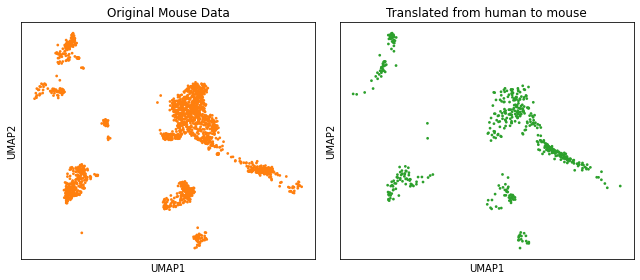

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sc.pl.umap(
    combined_adata[combined_adata.obs["transport_flag"] == "Original Data (mouse)"],
    color="transport_flag",
    show=False,
    size=30,
    ax=ax1,
    legend_loc=None,
    title="Original Mouse Data",
)
sc.pl.umap(
    combined_adata[combined_adata.obs["transport_flag"] == "Transported Human -> Mouse Cells"],
    color="transport_flag",
    show=False,
    size=30,
    ax=ax2,
    legend_loc=None,
    title="Translated from human to mouse",
)
# fig.suptitle("Translated from human to mouse", fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(BASE_PATH, "cell_ot_human_transported_vs_mouse_side_by_side.png"),
            facecolor="white", bbox_inches="tight", dpi=300)
plt.show()
plt.close()